In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("../input/heart-attack-analysis-prediction-dataset/heart.csv")

In [7]:
data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [10]:
y=data.output
X=data.copy()
X.drop(["output"],axis=1,inplace=True)
X.shape, y.shape

((303, 13), (303,))

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)


In [12]:
X_train.shape,y_train.shape

((203, 13), (203,))

In [21]:
# Creating a model
#setting random seed
tf.random.set_seed(42)
#model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(13,activation="elu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
#compile a model
model.compile(loss="binary_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics="accuracy")

In [22]:
history= model.fit(X_train,y_train,epochs=100)

Epoch 1/100
7/7 [==============================] - 0s 2ms/step - loss: 25.1125 - accuracy: 0.4773
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 7.8629 - accuracy: 0.4950
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 4.2965 - accuracy: 0.5285
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 2.7725 - accuracy: 0.5133
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 2.6703 - accuracy: 0.5362
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 1.8713 - accuracy: 0.5310
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 1.4952 - accuracy: 0.6081
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 1.1713 - accuracy: 0.6038
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 1.0210 - accuracy: 0.6256
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 0.9453 - accuracy: 0.5931
Epoch 11/100
7/7 [==========

In [23]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.5946 - accuracy: 0.8100


[0.5945712924003601, 0.8100000023841858]

<AxesSubplot:>

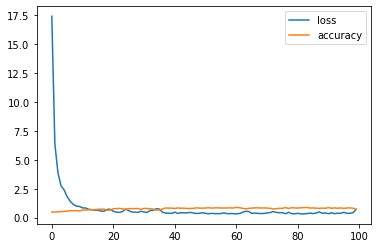

In [24]:
pd.DataFrame(history.history).plot()
